In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
from sgtaxidata import *

In [2]:
DBNAME="../taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952
x,y = utils.get_grid_cell(LAT,LON,20)
x1,y1 = utils.get_grid_cell(LAT1,LON1,20)
print x,y
print x1,y1


24 12
20 5


In [3]:
data=taxis.fetch_grid_by_date(DBNAME,"20170627")

In [4]:
df = pd.DataFrame(data)
df.columns=['time','x','y','taxicount']

In [5]:
df.head()


,time,x,y,taxicount
0,0000,0,0,0
1,0000,1,0,0
2,0000,2,0,0
3,0000,3,0,0
4,0000,4,0,0


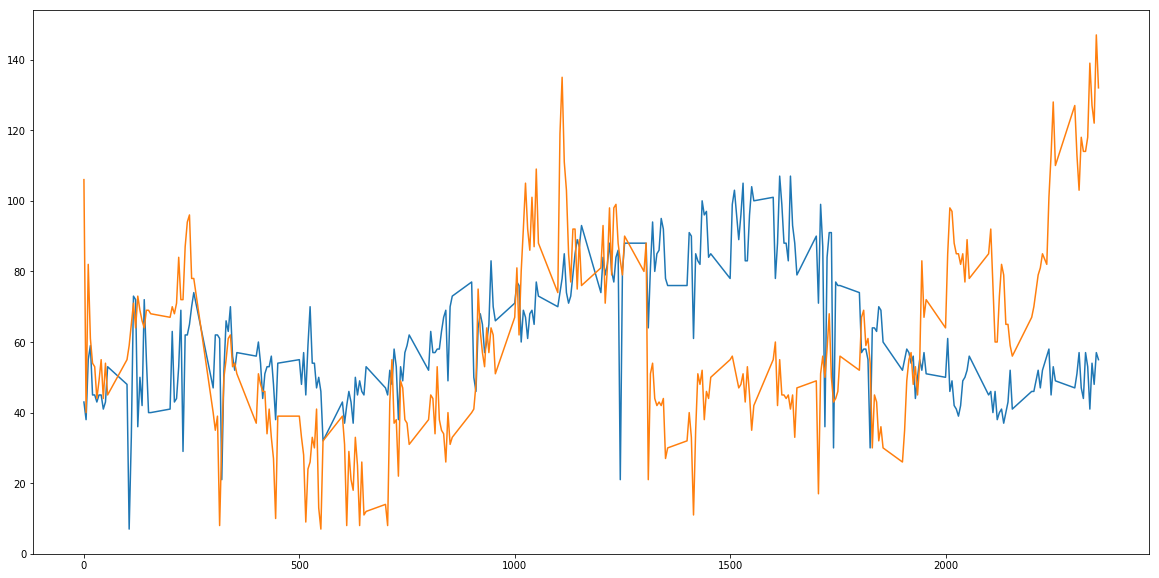

In [6]:
d1=df.query('x==20 and y==12')
x=d1['time'].tolist()
y=d1['taxicount'].tolist()
d2=df.query('x==20 and y==5')
x1=d2['time'].tolist()
y1=d2['taxicount'].tolist()
visualize.plot_data([(x,y),(x1,y1)])




In [12]:
visualize.plot_hist(range(len(y)),y,20,30,'Points','Taxi Count')


284 284 20 30
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

IndexError: list index out of range

In [ ]:
from sklearn.linear_model import LinearRegression

X = np.array(range(280))
y = (df.query('x==20 and y==12').head(280)['taxicount']).as_matrix()

print len(y)

X=X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

X_predict=np.array([281,282]).reshape(-1,1)

visualize.plot_model(X,y,model)


In [ ]:
by_hour = taxis.fetch_loc_by_time(DBNAME,"0905",LAT,LON)
df_hour = pd.DataFrame(by_hour)
df_hour.columns=['Date','X','Y','TaxiCount']
df_hour['Date']=pd.to_datetime(df_hour['Date'])
df_hour

In [ ]:
import datetime
X = np.array(range(4))
y = (df_hour.head(4)['TaxiCount']).as_matrix()

print X

X=X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

X_predict=np.array([2]).reshape(-1,1)



visualize.plot_model(X,y,model)

In [ ]:
import random
X = np.array(range(100))
y = np.array([x+random.random()*10 for x in range(100)])


X=X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

X_predict=np.array([50,101]).reshape(-1,1)


visualize.plot_model(X,y,model)